In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
salary = pd.read_csv('salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
salary_meta = pd.read_csv('Salary metadata.csv', delimiter=';')
salary_meta

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


In [4]:
salary_meta['Explanation'].iloc[7]

'Position (1 = Junior Employee, 2 = Manager, 3 = Executive)'

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


In [6]:
salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [7]:
salary['position'].unique()

array([1, 2, 3], dtype=int64)

for pos in salary['position'].unique():
    print(f"{salary[(salary.position == pos)]['salary'].isnull().sum()} - {pos}")
    name = 'pos'+str(pos)
    exec('%s = %d' % (name, salary[(salary.position == pos)]['salary'].isnull().sum()))

p1

In [8]:
def find_null_postition(df):
    for pos in df['position'].unique():
        if df[(df.position == pos)]['salary'].isnull().sum():
            return pos

In [9]:
pos = find_null_postition(salary)
pos #3 - Executive

3

In [10]:
fill = salary[salary.position == pos]['salary'].mean()
fill

61180.2712984762

In [11]:
salary['salary'].fillna(fill, inplace=True)

C:\Users\Aspire\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


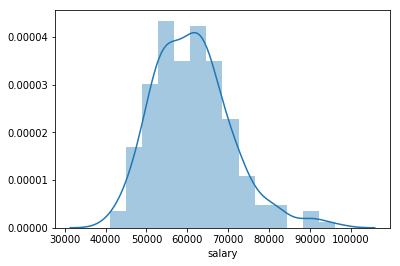

In [12]:
sns.distplot(salary[salary.position == pos]['salary'])

In [13]:
salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50883.292182,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12680.930483,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60387.750000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [14]:
salary.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.118900,0.624102,0.610916,0.406749,0.044825,0.166678,0.702580,0.362127,-0.496095,-0.070139
exprior,0.118900,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.624102,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610916,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.406749,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044825,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.166678,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.702580,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.362127,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.496095,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


In [15]:
X = salary[['yearsworked','yearsrank','exprior','market','yearsabs']]
y = salary['salary']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [17]:
sns.set(color_codes=True)

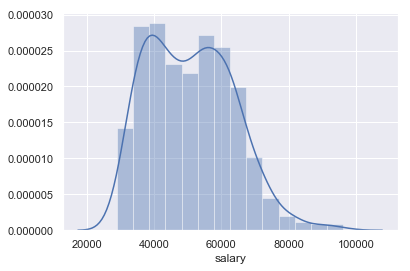

In [18]:
sns.distplot(salary.salary)

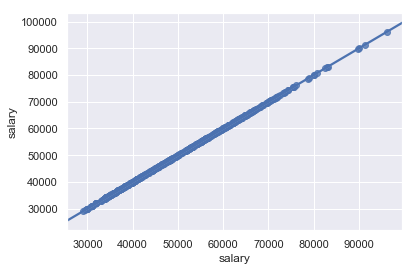

In [19]:
sns.regplot(x='salary', y='salary', data=salary)

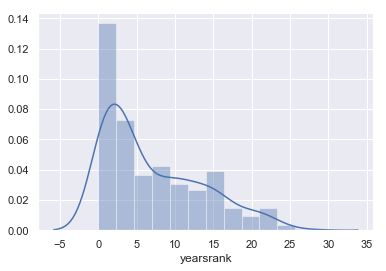

In [20]:
sns.distplot(salary.yearsrank)

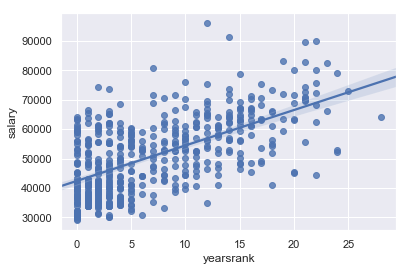

In [21]:
sns.regplot(x='yearsrank', y='salary', data=salary)

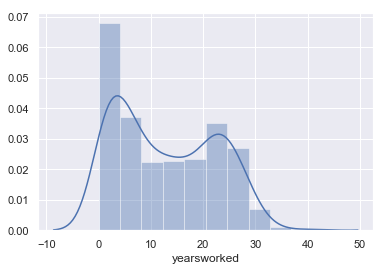

In [22]:
sns.distplot(salary.yearsworked)

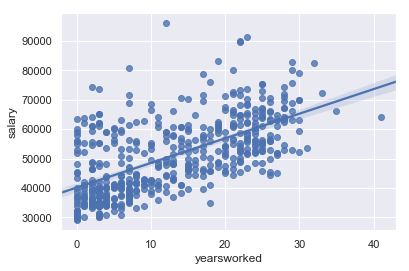

In [23]:
sns.regplot(x='yearsworked', y='salary', data=salary)

In [24]:
salary_processed = pd.get_dummies(salary, prefix_sep='__', columns=['position','Field'])

In [25]:
salary_processed.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,male,yearsabs,position__1,position__2,position__3,Field__1,Field__2,Field__3,Field__4
0,53000.0,0,0,0,1.17,1,0,1,0,1,0,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,0,1,0,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,2,1,0,0,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,0,0,0,1


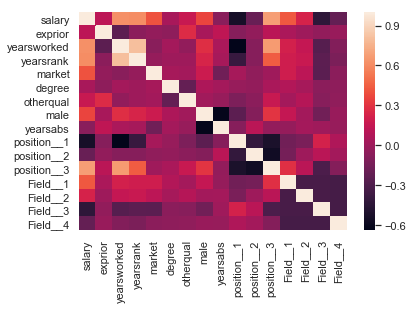

In [26]:
sns.heatmap(salary_processed.corr())

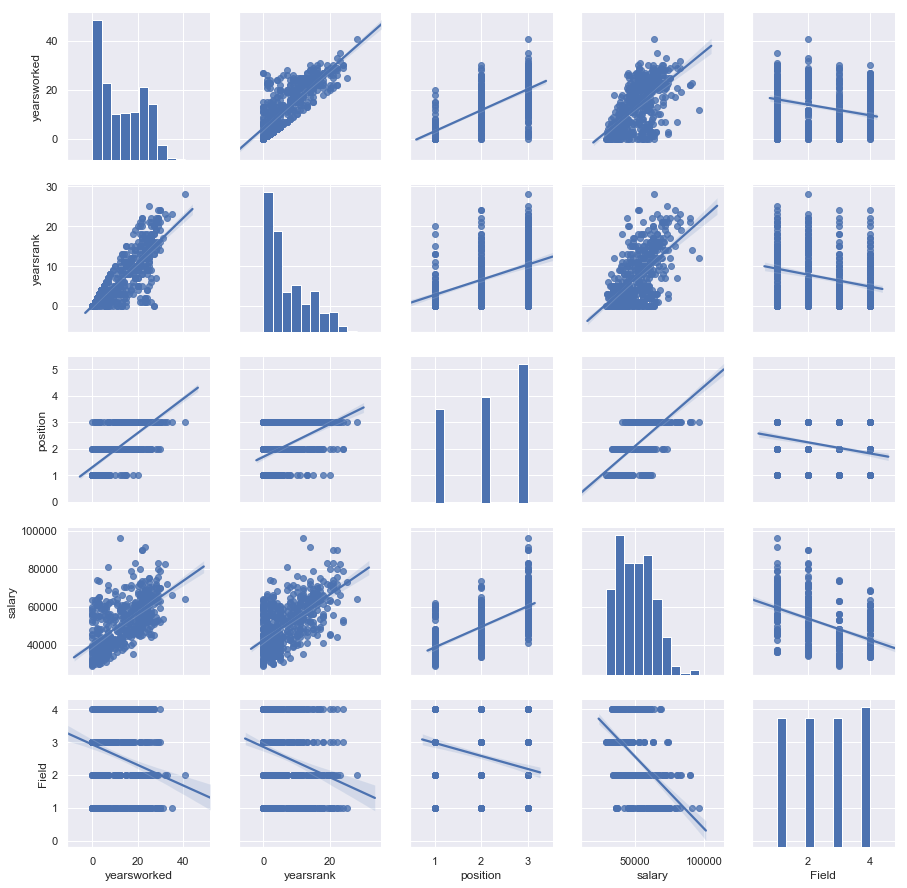

In [27]:
sns.pairplot(salary[['yearsworked','yearsrank','position','salary', 'Field']], kind='reg')

In [28]:
model = sm.OLS(y_train, X_train).fit()

In [29]:
prediction = model.predict(X_test)

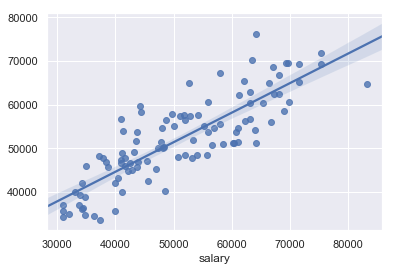

In [30]:
sns.regplot(x=y_test, y=prediction)

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     4466.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:00:34   Log-Likelihood:                -4222.2
No. Observations:                 411   AIC:                             8454.
Df Residuals:                     406   BIC:                             8475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked   811.0603     64.963     12.485      0.000     683.354     938.767
yearsrank     264.5019     94.055      2.812      0.005      79.607     449.397
exprior       774.6748     77.212     10.033      0.000     622.889     926.460
market       3.899e+04    682.608     57.118      0.000    3.76e+04    4.03e+04
yearsabs      -59.7796     21.365     -2.798      0.005    -101.779     -17.780
==============================================================================
Omnibus:                       25.410   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.465
Skew:                           0.416   Prob(JB):                     6.01e-10
Kurtosis:                       4.337   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
predicted = pd.concat([X_test, y_test, prediction], axis=1)
predicted.rename(columns={0:'Prediction'}, inplace=True)
predicted['Residual'] = predicted['salary'] - predicted['Prediction']
predicted

,yearsworked,yearsrank,exprior,market,yearsabs,salary,Prediction,Residual
302,19,13,5,0.82,0,61123.00000,54693.186006,6429.813994
115,9,3,1,0.78,0,34000.00000,39279.295572,-5279.295572
273,23,12,0,0.99,1,65432.00000,60367.935802,5064.064198
164,5,5,11,0.96,1,60190.00000,51269.082169,8920.917831
457,9,2,1,1.02,29,42603.00000,46638.591999,-4035.591999
227,2,2,20,0.86,0,64161.00000,51175.330047,12985.669953
259,25,15,0,1.14,1,67062.00000,68631.940731,-1569.940731
416,3,3,0,0.84,7,40000.00000,35559.153272,4440.846728
246,24,12,0,0.86,2,66789.70313,56050.621142,10739.081988
145,7,4,7,0.87,1,41723.00000,46018.975034,-4295.975034
